# Chapter 8: Discussions on Universality and Practical Applications.

This page contains simulations in Chapter 1 and 8.

## Contents

    - Gaussian kernel matrices of small and large dimensional GAUSSIAN data
    - Gaussian kernel matrices of real-world data
    - MNIST images versus Gaussian vectors with the same statistics

## Gaussian kernel matrices of small and large dimensional GAUSSIAN data


In [55]:
import numpy as np
import scipy.sparse.linalg
import scipy.linalg
from tensorflow.keras.datasets import mnist,fashion_mnist
import matplotlib.pyplot as plt
pi = np.pi

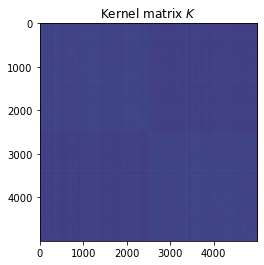

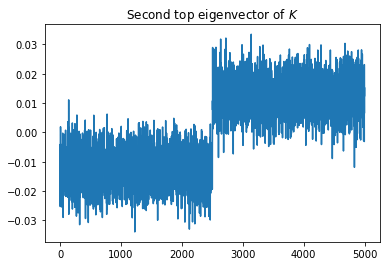

In [42]:
n = 5000
cs = [1/2,1/2]
k = len(cs)

p = 250
means = lambda a : (-1)**a*np.concatenate([[2],np.zeros(p-1)])
covs  = lambda a : np.eye(p)

X=np.zeros((p,n))

for i in range(k):
    X[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1])*n)]=np.sqrt(covs(i+1))@np.random.randn(p,int(cs[i]*n))+means(i+1).reshape(p,1)

XX = X.T.dot(X)
d  = np.diag(XX)
K = np.exp(-(-2*XX+d.reshape(n,1)+d.reshape(1,n))/2/p)

V_K = scipy.sparse.linalg.eigsh(K,3)[1]

plt.imshow(K)
_ = plt.title(r'Kernel matrix $K$')

plt.figure()
plt.plot(V_K[:,1])
_ = plt.title(r'Second top eigenvector of $K$')

## Gaussian kernel matrices of real-world data



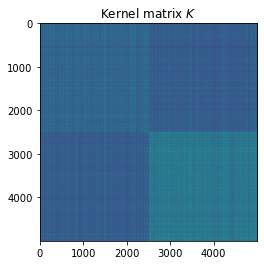

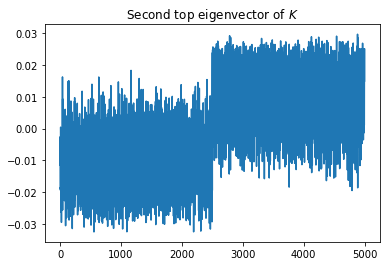

In [72]:
n = 5000
cs = np.array([1/2,1/2])
ns = cs*k
k = len(cs)

testcase='MNIST'

if testcase == 'MNIST':
    selected_labels=[8,9]
    (init_data, init_labels), _ = mnist.load_data()

if testcase == 'fashion':
    selected_labels=[5,7]
    (init_data, init_labels), _ = fashion_mnist.load_data()
    
idx_init_labels = np.argsort(np.array(init_labels))    
labels = init_labels[idx_init_labels]
init_data = init_data[idx_init_labels,:,:]
data = np.transpose(init_data.reshape(np.shape(init_data)[0],np.shape(init_data)[1]*np.shape(init_data)[2]))
init_n,p=np.shape(data)[1],np.shape(data)[0]

data = data/data.max()
mean_data=np.mean(data,axis=1).reshape(len(data),1)

norm2_data=0
for i in range(init_n):
    norm2_data+=1/init_n*np.linalg.norm(data[:,i]-mean_data)**2

data=(data-mean_data)/np.sqrt(norm2_data)*np.sqrt(p)

selected_data = []

for i in range(len(selected_labels)):
    selected_data.append(data[:,[ x for x in range(init_n) if labels[x]==selected_labels[i] ] ])
    if i==0:    
        cascade_selected_data = selected_data[-1]
    else:
        np.concatenate([cascade_selected_data,selected_data[-1]],axis=1)

# recentering of the k classes
mean_selected_data  = np.mean(cascade_selected_data,axis=1).reshape(len(cascade_selected_data),1)
norm2_selected_data = np.mean(np.sum(np.power(np.abs(cascade_selected_data-mean_selected_data),2),0))

for j in range(len(selected_labels)):
    selected_data[j]=(selected_data[j]-mean_selected_data)/np.sqrt(norm2_selected_data)*np.sqrt(p)

X=np.zeros( (p,n) )

for i in range(k):
    data = selected_data[i][:,np.random.permutation(np.shape(selected_data[i])[1])]
    X[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1])*n)]=data[:,:int(n*cs[i])] 
    
    
XX = X.T.dot(X)
d  = np.diag(XX)
K = np.exp(-(-2*XX+d.reshape(n,1)+d.reshape(1,n))/2/p)

V_K = scipy.sparse.linalg.eigsh(K,3)[1]
plt.imshow(K)
_ = plt.title(r'Kernel matrix $K$')

plt.figure()
plt.plot(V_K[:,1])
_ = plt.title(r'Second top eigenvector of $K$')

## MNIST images versus Gaussian vectors with the same statistics

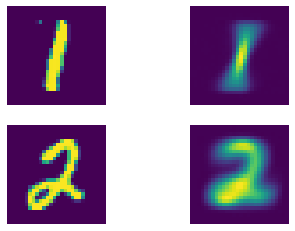

In [71]:
selected_labels=[1,2]
(init_data, init_labels), _ = mnist.load_data()

idx_init_labels = np.argsort(np.array(init_labels))    
labels = init_labels[idx_init_labels]
init_data = init_data[idx_init_labels,:,:]
data = np.transpose(init_data.reshape(np.shape(init_data)[0],np.shape(init_data)[1]*np.shape(init_data)[2]))
init_n,p=np.shape(data)[1],np.shape(data)[0]

selected_data = []

for i in range(len(selected_labels)):
    selected_data.append(data[:,[ x for x in range(init_n) if labels[x]==selected_labels[i] ] ])
    if i==0:    
        cascade_selected_data = selected_data[-1]
    else:
        np.concatenate([cascade_selected_data,selected_data[-1]],axis=1)
        
means = lambda l : np.mean(selected_data[l],axis=1)
covs  = lambda l : 1/np.shape(selected_data[l])[1]*(selected_data[l]@selected_data[l].T)-np.outer(means(l),means(l))
 
class_1_image = selected_data[0][:,0]
class_1_image = np.reshape(class_1_image,(int(np.sqrt(p)),int(np.sqrt(p))))
class_2_image = selected_data[1][:,0]
class_2_image = np.reshape(class_2_image,(int(np.sqrt(p)),int(np.sqrt(p))))

z = np.random.randn(p)
class_1_gauss = np.reshape(means(0)+(scipy.linalg.sqrtm(covs(0))@z),(int(np.sqrt(p)),int(np.sqrt(p))))
class_2_gauss = np.reshape(means(1)+(scipy.linalg.sqrtm(covs(1))@z),(int(np.sqrt(p)),int(np.sqrt(p))))

plt.figure()
plt.subplot(2,2,1)
plt.imshow(class_1_image)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(np.real(class_1_gauss))
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(class_2_image)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(np.real(class_2_gauss))
_ = plt.axis('off')